Entrenar una red neuronal que dé la solución de las siguientes ecuaciones diferenciales en el el intervalo $[-5,5]$.  Graficar la solucion numérica junto con la solucion analıtica.

$ (a)\hspace{1cm} xy^\prime+y = x^2 \cos(x) \hspace{0.2cm}$  con $\hspace{0.2cm} y(0) = 0$

$ (b)\hspace{1cm} \frac{d^2y}{dx^2} = -y \hspace{0.2cm}$  con $ \hspace{0.2cm}y(0) = 1, \hspace{0.2cm} y(0) = -0.5 $

# $ (a)\hspace{1cm} xy^\prime+y = x^2 \cos(x) \hspace{0.2cm}$  con $\hspace{0.2cm} y(0) = 0$


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import math

### class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        batch_size=tf.shape(data)[0]
        x=tf.random.uniform((batch_size,1),minval=-5,maxval=5)
    
        with tf.GradientTape() as tape: 
            #Compute the loss value
            with tf.GradientTape() as tape2: 
                tape2.watch(x)
                y_pred = self(x, training=True)
            dy = tape2.gradient(y_pred, x)
            x_o = tf.zeros((batch_size, 1))
            y_o = self(x_o, training = True)
            eq = x*dy + y_pred-x**2
            ic = y_o
            loss= keras.losses.mean_squared_error(0., eq) + keras.losses.mean_absolute_error(0., ic)
        # Apply grads
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        # Update metrics
        self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
        return {"loss": self.loss_tracker.result()}

In [22]:
model = ODEsolver()

model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [23]:
model.summary()

Model: "od_esolver_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer = RMSprop(), metrics=['loss'])

x= tf.linspace(-5,5,100)
history = model.fit(x, epochs=3000, verbose=1)

x_testv = tf.linspace(-5,5,100)
a = model.predict(x_testv)

Epoch 1/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3093
Epoch 2/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2431
Epoch 3/3000
4/4 [==============================] - 0s 835us/step - loss: 0.1874
Epoch 4/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2298
Epoch 5/3000
4/4 [==============================] - 0s 668us/step - loss: 0.2040
Epoch 6/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2188
Epoch 7/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2434
Epoch 8/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2211
Epoch 9/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1977
Epoch 10/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1661
Epoch 11/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2362
Epoch 12/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2055
Epoch 13/3000
4/4 [==============

4/4 [==============================] - 0s 667us/step - loss: 0.1913
Epoch 201/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2119
Epoch 202/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2027
Epoch 203/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2344
Epoch 204/3000
4/4 [==============================] - 0s 666us/step - loss: 0.1754
Epoch 205/3000
4/4 [==============================] - 0s 663us/step - loss: 0.1722
Epoch 206/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2193
Epoch 207/3000
4/4 [==============================] - 0s 667us/step - loss: 0.3233
Epoch 208/3000
4/4 [==============================] - 0s 666us/step - loss: 0.1585
Epoch 209/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2380
Epoch 210/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2061
Epoch 211/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2102
Epoch 212/3000
4/4 [===

4/4 [==============================] - 0s 667us/step - loss: 0.1736
Epoch 300/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2034
Epoch 301/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2140
Epoch 302/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2076
Epoch 303/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2616
Epoch 304/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1936
Epoch 305/3000
4/4 [==============================] - 0s 666us/step - loss: 0.1625
Epoch 306/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2039
Epoch 307/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1683
Epoch 308/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2328
Epoch 309/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2370
Epoch 310/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2300
Epoch 311/3000
4/4 

Epoch 398/3000
4/4 [==============================] - 0s 666us/step - loss: 0.1750
Epoch 399/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1881
Epoch 400/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1875
Epoch 401/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2064
Epoch 402/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1930
Epoch 403/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1600
Epoch 404/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2485
Epoch 405/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2038
Epoch 406/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1664
Epoch 407/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2064
Epoch 408/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2263
Epoch 409/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2154
Epoc

4/4 [==============================] - 0s 667us/step - loss: 0.1862
Epoch 596/3000
4/4 [==============================] - 0s 770us/step - loss: 0.1924
Epoch 597/3000
4/4 [==============================] - 0s 669us/step - loss: 0.1968
Epoch 598/3000
4/4 [==============================] - 0s 675us/step - loss: 0.2002
Epoch 599/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1832
Epoch 600/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1975
Epoch 601/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1575
Epoch 602/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1898
Epoch 603/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2118
Epoch 604/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1971
Epoch 605/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2061
Epoch 606/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1818
Epoch 607/3000
4/4 [=

Epoch 694/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1906
Epoch 695/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1543
Epoch 696/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2058
Epoch 697/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1790
Epoch 698/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2274
Epoch 699/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1570
Epoch 700/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1844
Epoch 701/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2208
Epoch 702/3000
4/4 [==============================] - 0s 333us/step - loss: 0.1931
Epoch 703/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1830
Epoch 704/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2510
Epoch 705/3000
4/4 [==============================] - 0s 333us/step - loss: 0.1445
Epoc

4/4 [==============================] - 0s 667us/step - loss: 0.2074
Epoch 892/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1981
Epoch 893/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1949
Epoch 894/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1594
Epoch 895/3000
4/4 [==============================] - 0s 666us/step - loss: 0.1929
Epoch 896/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2362
Epoch 897/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1852
Epoch 898/3000
4/4 [==============================] - 0s 666us/step - loss: 0.1839
Epoch 899/3000
4/4 [==============================] - 0s 666us/step - loss: 0.1207
Epoch 900/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2502
Epoch 901/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1812
Epoch 902/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1710
Epoch 903/3000
4/4

4/4 [==============================] - 0s 667us/step - loss: 0.1988
Epoch 991/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2005
Epoch 992/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1782
Epoch 993/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1810
Epoch 994/3000
4/4 [==============================] - 0s 666us/step - loss: 0.1743
Epoch 995/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2456
Epoch 996/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1638
Epoch 997/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1792
Epoch 998/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1593
Epoch 999/3000
4/4 [==============================] - 0s 333us/step - loss: 0.2244
Epoch 1000/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2093
Epoch 1001/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1781
Epoch 1002/3000
4/4

4/4 [==============================] - 0s 667us/step - loss: 0.1681
Epoch 1185/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1663
Epoch 1186/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2029
Epoch 1187/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1867
Epoch 1188/3000
4/4 [==============================] - 0s 333us/step - loss: 0.1757
Epoch 1189/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2356
Epoch 1190/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2066
Epoch 1191/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1730
Epoch 1192/3000
4/4 [==============================] - 0s 333us/step - loss: 0.2040
Epoch 1193/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2314
Epoch 1194/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1924
Epoch 1195/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1892
Epoch 11

4/4 [==============================] - 0s 667us/step - loss: 0.1754
Epoch 1379/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1892
Epoch 1380/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1803
Epoch 1381/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1994
Epoch 1382/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2056
Epoch 1383/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1551
Epoch 1384/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1728
Epoch 1385/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2254
Epoch 1386/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1569
Epoch 1387/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2278
Epoch 1388/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1810
Epoch 1389/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1799
Epoch 13

4/4 [==============================] - 0s 333us/step - loss: 0.1851
Epoch 1573/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2031
Epoch 1574/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2591
Epoch 1575/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1869
Epoch 1576/3000
4/4 [==============================] - 0s 333us/step - loss: 0.2133
Epoch 1577/3000
4/4 [==============================] - 0s 666us/step - loss: 0.1736
Epoch 1578/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2113
Epoch 1579/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1566
Epoch 1580/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2106
Epoch 1581/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1434
Epoch 1582/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2026
Epoch 1583/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2048
Epoch 1584

4/4 [==============================] - 0s 667us/step - loss: 0.1736
Epoch 1767/3000
4/4 [==============================] - 0s 333us/step - loss: 0.2316
Epoch 1768/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1591
Epoch 1769/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1817
Epoch 1770/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1960
Epoch 1771/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1646
Epoch 1772/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1877
Epoch 1773/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1657
Epoch 1774/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1683
Epoch 1775/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2362
Epoch 1776/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1953
Epoch 1777/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1859
Epoch 1778

4/4 [==============================] - 0s 1ms/step - loss: 0.1994
Epoch 1961/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2097
Epoch 1962/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1738
Epoch 1963/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1841
Epoch 1964/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1266
Epoch 1965/3000
4/4 [==============================] - 0s 671us/step - loss: 0.2281
Epoch 1966/3000
4/4 [==============================] - 0s 663us/step - loss: 0.1934
Epoch 1967/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1805
Epoch 1968/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2365
Epoch 1969/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1793
Epoch 1970/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1621
Epoch 1971/3000
4/4 [==============================] - 0s 666us/step - loss: 0.1896
Epoch 1972/3000


4/4 [==============================] - 0s 667us/step - loss: 0.1540
Epoch 2059/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1480
Epoch 2060/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2241
Epoch 2061/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2073
Epoch 2062/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1643
Epoch 2063/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1519
Epoch 2064/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1458
Epoch 2065/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1662
Epoch 2066/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2635
Epoch 2067/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1667
Epoch 2068/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1773
Epoch 2069/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2029
Epoch 2070

4/4 [==============================] - 0s 667us/step - loss: 0.2786
Epoch 2254/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1294
Epoch 2255/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1841
Epoch 2256/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1767
Epoch 2257/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1650
Epoch 2258/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1552
Epoch 2259/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1776
Epoch 2260/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1986
Epoch 2261/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2070
Epoch 2262/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1932
Epoch 2263/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1693
Epoch 2264/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1630
Epoch 

4/4 [==============================] - 0s 333us/step - loss: 0.1522
Epoch 2448/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1907
Epoch 2449/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1605
Epoch 2450/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1841
Epoch 2451/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2287
Epoch 2452/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1768
Epoch 2453/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1379
Epoch 2454/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2261
Epoch 2455/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1738
Epoch 2456/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1759
Epoch 2457/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1521
Epoch 2458/3000
4/4 [==============================] - 0s 666us/step - loss: 0.1719
Epoch 24

4/4 [==============================] - 0s 667us/step - loss: 0.1706
Epoch 2642/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2219
Epoch 2643/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1838
Epoch 2644/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1920
Epoch 2645/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1880
Epoch 2646/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1510
Epoch 2647/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1696
Epoch 2648/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1764
Epoch 2649/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1747
Epoch 2650/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1727
Epoch 2651/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1806
Epoch 2652/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1811
Epoch 265

Epoch 2836/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2241
Epoch 2837/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1639
Epoch 2838/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1908
Epoch 2839/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1735
Epoch 2840/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1582
Epoch 2841/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1757
Epoch 2842/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1599
Epoch 2843/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1982
Epoch 2844/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1434
Epoch 2845/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1570
Epoch 2846/3000
4/4 [==============================] - 0s 666us/step - loss: 0.1998
Epoch 2847/3000
4/4 [==============================] - 0s 667us/step - loss:

La solución a esta ecuación diferencial es $\frac{x^2}{3}$

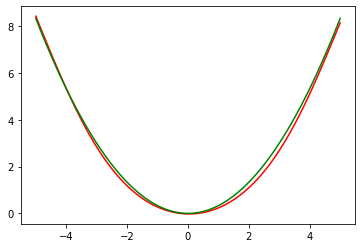

In [31]:
plt.plot(x_testv, a, color='red')
plt.plot(x_testv,x**2/3, color= 'green')
plt.show()

# $ (b)\hspace{1cm} \frac{d^2y}{dx^2} = -y \hspace{0.2cm}$  con $ \hspace{0.2cm}y(0) = 1, \hspace{0.2cm} yprime\(0) = -0.5 $

In [33]:
class PDEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        
    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        batch_size=100
        x=tf.random.uniform((batch_size,1),minval=0,maxval=10)
        t=tf.random.uniform((batch_size,1),minval=0,maxval=15)
    
        with tf.GradientTape() as tape: 
            #Compute the loss value
            with tf.GradientTape(persistent=True) as g: 
                g.watch(x)
                g.watch(t)
                
                with tf.GradientTape() as gg: 
                    gg.watch(x)
                    X_T = tf.concat([x,t], axis=1)
                    y_pred =self(X_T, training = True)
                    
                y_x = gg.gradient(y_pred, x)
            y_xx = g.gradient(y_x,x)
            y_t = g.gradient(y_pred, t)
            
            pde = y_t - 0.5*y_xx
            
            print(batch_size)
            print("---")
            x_ini = tf.random.uniform((batch_size, 1), minval= 0, maxval= 10)
            X_T_init = tf.concat([x_ini, tf.zeros((x_ini.shape[0], 1))], axis=1)
            y_init = self(X_T_init, training = True ) - tf.math.sin(x_ini)
            
            loss= keras.losses.mean_squared_error(0., pde) + keras.losses.mean_absolute_error(0., y_init)
        # Apply grads
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        # Update metrics
        self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
        return {"loss": self.loss_tracker.result()}

In [17]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        
    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        batch_size=tf.shape(data)[0]
        x=tf.random.uniform((batch_size,1),minval=-5,maxval=5)
    
        with tf.GradientTape() as tape: 
            #Compute the loss value
            with tf.GradientTape() as tape2: 
                with tf.GradientTape(persistent = True) as tape3:
                    tape3.watch(x)
                    y_pred = self(x, training = True)
                    x_o = tf.zeros((batch_size, 1))
                    y_o = self(x_o, training = True)
                tape2.watch(x)
                dy = tape3.gradient(y_pred, x)
                dy_o= tape3.gradient(y_o, x_o)
            ddy=tape2.gradient(dy,x)
            eq = ddy+y
            ic1 = y_o-1
            ic2= dy_o+0.5
            loss= keras.losses.mean_squared_error(0., eq) + keras.losses.mean_absolute_error(0., ic1)+ keras.losses.mean_squared_error(0., ic2)
        # Apply grads
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        # Update metrics
        self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
        return {"loss": self.loss_tracker.result()}

In [18]:
model = ODEsolver()

model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [19]:
model.summary()

Model: "od_esolver_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = RMSprop(), metrics=['loss'])

x= tf.linspace(-5,5,100)
history = model.fit(x, epochs=3000, verbose=1)

x_testv = tf.linspace(-5,5,100)
a = model.predict(x_testv)

Epoch 1/3000
4/4 [==============================] - 1s 6ms/step - loss: 121.4610
Epoch 2/3000
4/4 [==============================] - 0s 3ms/step - loss: 118.3265
Epoch 3/3000
4/4 [==============================] - 0s 3ms/step - loss: 159.1728
Epoch 4/3000
4/4 [==============================] - 0s 0s/step - loss: 108.1635
Epoch 5/3000
4/4 [==============================] - 0s 3ms/step - loss: 121.5966
Epoch 6/3000
4/4 [==============================] - 0s 3ms/step - loss: 132.7500
Epoch 7/3000
4/4 [==============================] - 0s 3ms/step - loss: 96.6599
Epoch 8/3000
4/4 [==============================] - 0s 0s/step - loss: 150.3177
Epoch 9/3000
4/4 [==============================] - 0s 3ms/step - loss: 145.0721
Epoch 10/3000
4/4 [==============================] - 0s 3ms/step - loss: 109.5993
Epoch 11/3000
4/4 [==============================] - 0s 0s/step - loss: 106.6327
Epoch 12/3000
4/4 [==============================] - 0s 3ms/step - loss: 143.6856
Epoch 13/3000
4/4 [==========

4/4 [==============================] - 0s 3ms/step - loss: 92.4344
Epoch 102/3000
4/4 [==============================] - 0s 3ms/step - loss: 102.4121
Epoch 103/3000
4/4 [==============================] - 0s 3ms/step - loss: 115.6171
Epoch 104/3000
4/4 [==============================] - 0s 3ms/step - loss: 108.9372
Epoch 105/3000
4/4 [==============================] - 0s 3ms/step - loss: 112.4645
Epoch 106/3000
4/4 [==============================] - 0s 0s/step - loss: 99.6375
Epoch 107/3000
4/4 [==============================] - 0s 0s/step - loss: 102.4745
Epoch 108/3000
4/4 [==============================] - 0s 2ms/step - loss: 73.0358
Epoch 109/3000
4/4 [==============================] - 0s 3ms/step - loss: 101.0043
Epoch 110/3000
4/4 [==============================] - 0s 3ms/step - loss: 75.6167
Epoch 111/3000
4/4 [==============================] - 0s 3ms/step - loss: 109.4148
Epoch 112/3000
4/4 [==============================] - 0s 0s/step - loss: 93.8709
Epoch 113/3000
4/4 [=======

4/4 [==============================] - 0s 3ms/step - loss: 87.1969
Epoch 202/3000
4/4 [==============================] - 0s 3ms/step - loss: 87.0910
Epoch 203/3000
4/4 [==============================] - 0s 0s/step - loss: 75.8656
Epoch 204/3000
4/4 [==============================] - 0s 3ms/step - loss: 69.6457
Epoch 205/3000
4/4 [==============================] - 0s 3ms/step - loss: 77.7363
Epoch 206/3000
4/4 [==============================] - 0s 3ms/step - loss: 75.5975
Epoch 207/3000
4/4 [==============================] - 0s 0s/step - loss: 64.2696
Epoch 208/3000
4/4 [==============================] - 0s 0s/step - loss: 64.7586
Epoch 209/3000
4/4 [==============================] - 0s 0s/step - loss: 88.7473
Epoch 210/3000
4/4 [==============================] - 0s 3ms/step - loss: 75.0827
Epoch 211/3000
4/4 [==============================] - 0s 3ms/step - loss: 66.8267
Epoch 212/3000
4/4 [==============================] - 0s 3ms/step - loss: 69.6781
Epoch 213/3000
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 45.5325
Epoch 302/3000
4/4 [==============================] - 0s 0s/step - loss: 62.9194
Epoch 303/3000
4/4 [==============================] - 0s 3ms/step - loss: 62.1503
Epoch 304/3000
4/4 [==============================] - 0s 3ms/step - loss: 55.4181
Epoch 305/3000
4/4 [==============================] - 0s 0s/step - loss: 67.0941
Epoch 306/3000
4/4 [==============================] - 0s 3ms/step - loss: 48.0907
Epoch 307/3000
4/4 [==============================] - 0s 3ms/step - loss: 47.2761
Epoch 308/3000
4/4 [==============================] - 0s 3ms/step - loss: 42.3917
Epoch 309/3000
4/4 [==============================] - 0s 3ms/step - loss: 60.4890
Epoch 310/3000
4/4 [==============================] - 0s 0s/step - loss: 46.9905
Epoch 311/3000
4/4 [==============================] - 0s 3ms/step - loss: 54.0560
Epoch 312/3000
4/4 [==============================] - 0s 3ms/step - loss: 54.2687
Epoch 313/3000
4/4 [==============

4/4 [==============================] - 0s 0s/step - loss: 29.9555
Epoch 402/3000
4/4 [==============================] - 0s 3ms/step - loss: 37.9430
Epoch 403/3000
4/4 [==============================] - 0s 3ms/step - loss: 40.2071
Epoch 404/3000
4/4 [==============================] - 0s 0s/step - loss: 50.8089
Epoch 405/3000
4/4 [==============================] - 0s 3ms/step - loss: 35.6115
Epoch 406/3000
4/4 [==============================] - 0s 3ms/step - loss: 39.5063
Epoch 407/3000
4/4 [==============================] - 0s 3ms/step - loss: 31.9945
Epoch 408/3000
4/4 [==============================] - 0s 0s/step - loss: 36.3159
Epoch 409/3000
4/4 [==============================] - 0s 3ms/step - loss: 44.3034
Epoch 410/3000
4/4 [==============================] - 0s 3ms/step - loss: 42.6322
Epoch 411/3000
4/4 [==============================] - 0s 3ms/step - loss: 33.7946
Epoch 412/3000
4/4 [==============================] - 0s 3ms/step - loss: 42.0063
Epoch 413/3000
4/4 [==============

4/4 [==============================] - 0s 0s/step - loss: 31.2280
Epoch 502/3000
4/4 [==============================] - 0s 3ms/step - loss: 32.5533
Epoch 503/3000
4/4 [==============================] - 0s 3ms/step - loss: 32.0045
Epoch 504/3000
4/4 [==============================] - 0s 0s/step - loss: 33.9800
Epoch 505/3000
4/4 [==============================] - 0s 3ms/step - loss: 29.0072
Epoch 506/3000
4/4 [==============================] - 0s 3ms/step - loss: 33.3740
Epoch 507/3000
4/4 [==============================] - 0s 0s/step - loss: 27.3850
Epoch 508/3000
4/4 [==============================] - 0s 3ms/step - loss: 41.5925
Epoch 509/3000
4/4 [==============================] - 0s 3ms/step - loss: 23.3822
Epoch 510/3000
4/4 [==============================] - 0s 3ms/step - loss: 25.8994
Epoch 511/3000
4/4 [==============================] - 0s 3ms/step - loss: 35.3280
Epoch 512/3000
4/4 [==============================] - 0s 3ms/step - loss: 28.4704
Epoch 513/3000
4/4 [==============

4/4 [==============================] - 0s 3ms/step - loss: 27.6658
Epoch 602/3000
4/4 [==============================] - 0s 3ms/step - loss: 21.5728
Epoch 603/3000
4/4 [==============================] - 0s 0s/step - loss: 23.3708
Epoch 604/3000
4/4 [==============================] - 0s 3ms/step - loss: 19.4656
Epoch 605/3000
4/4 [==============================] - 0s 3ms/step - loss: 26.9664
Epoch 606/3000
4/4 [==============================] - 0s 3ms/step - loss: 22.3572
Epoch 607/3000
4/4 [==============================] - 0s 3ms/step - loss: 23.1928
Epoch 608/3000
4/4 [==============================] - 0s 3ms/step - loss: 20.0172
Epoch 609/3000
4/4 [==============================] - 0s 0s/step - loss: 27.4564
Epoch 610/3000
4/4 [==============================] - 0s 3ms/step - loss: 27.9452
Epoch 611/3000
4/4 [==============================] - 0s 3ms/step - loss: 20.5580
Epoch 612/3000
4/4 [==============================] - 0s 3ms/step - loss: 21.6167
Epoch 613/3000
4/4 [=============

4/4 [==============================] - 0s 0s/step - loss: 21.4925
Epoch 702/3000
4/4 [==============================] - 0s 3ms/step - loss: 19.4472
Epoch 703/3000
4/4 [==============================] - 0s 3ms/step - loss: 23.5283
Epoch 704/3000
4/4 [==============================] - 0s 3ms/step - loss: 19.4522
Epoch 705/3000
4/4 [==============================] - 0s 0s/step - loss: 13.7103
Epoch 706/3000
4/4 [==============================] - 0s 3ms/step - loss: 20.6261
Epoch 707/3000
4/4 [==============================] - 0s 3ms/step - loss: 20.1924
Epoch 708/3000
4/4 [==============================] - 0s 0s/step - loss: 19.7164
Epoch 709/3000
4/4 [==============================] - 0s 3ms/step - loss: 21.9617
Epoch 710/3000
4/4 [==============================] - 0s 3ms/step - loss: 16.2407
Epoch 711/3000
4/4 [==============================] - 0s 3ms/step - loss: 24.4417
Epoch 712/3000
4/4 [==============================] - 0s 0s/step - loss: 16.9409
Epoch 713/3000
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 15.2880
Epoch 802/3000
4/4 [==============================] - 0s 0s/step - loss: 11.9257
Epoch 803/3000
4/4 [==============================] - 0s 3ms/step - loss: 15.5000
Epoch 804/3000
4/4 [==============================] - 0s 3ms/step - loss: 12.7586
Epoch 805/3000
4/4 [==============================] - 0s 3ms/step - loss: 12.1117
Epoch 806/3000
4/4 [==============================] - 0s 0s/step - loss: 14.1616
Epoch 807/3000
4/4 [==============================] - 0s 0s/step - loss: 14.5491
Epoch 808/3000
4/4 [==============================] - 0s 0s/step - loss: 14.0062
Epoch 809/3000
4/4 [==============================] - 0s 3ms/step - loss: 13.8978
Epoch 810/3000
4/4 [==============================] - 0s 3ms/step - loss: 15.1783
Epoch 811/3000
4/4 [==============================] - 0s 3ms/step - loss: 11.7331
Epoch 812/3000
4/4 [==============================] - 0s 0s/step - loss: 15.3915
Epoch 813/3000
4/4 [================

4/4 [==============================] - 0s 3ms/step - loss: 11.9137
Epoch 902/3000
4/4 [==============================] - 0s 3ms/step - loss: 11.3182
Epoch 903/3000
4/4 [==============================] - 0s 0s/step - loss: 12.1781
Epoch 904/3000
4/4 [==============================] - 0s 3ms/step - loss: 11.0935
Epoch 905/3000
4/4 [==============================] - 0s 3ms/step - loss: 9.9236
Epoch 906/3000
4/4 [==============================] - 0s 0s/step - loss: 11.6737
Epoch 907/3000
4/4 [==============================] - 0s 3ms/step - loss: 9.0012
Epoch 908/3000
4/4 [==============================] - 0s 3ms/step - loss: 11.8651
Epoch 909/3000
4/4 [==============================] - 0s 3ms/step - loss: 11.0050
Epoch 910/3000
4/4 [==============================] - 0s 0s/step - loss: 10.7873
Epoch 911/3000
4/4 [==============================] - 0s 3ms/step - loss: 7.7310
Epoch 912/3000
4/4 [==============================] - 0s 3ms/step - loss: 8.5178
Epoch 913/3000
4/4 [==================

4/4 [==============================] - 0s 0s/step - loss: 9.7485
Epoch 1003/3000
4/4 [==============================] - 0s 3ms/step - loss: 8.4105
Epoch 1004/3000
4/4 [==============================] - 0s 3ms/step - loss: 9.8362
Epoch 1005/3000
4/4 [==============================] - 0s 0s/step - loss: 7.7891
Epoch 1006/3000
4/4 [==============================] - 0s 3ms/step - loss: 6.0325
Epoch 1007/3000
4/4 [==============================] - 0s 3ms/step - loss: 6.7720
Epoch 1008/3000
4/4 [==============================] - 0s 0s/step - loss: 10.8722
Epoch 1009/3000
4/4 [==============================] - 0s 3ms/step - loss: 6.1458
Epoch 1010/3000
4/4 [==============================] - 0s 3ms/step - loss: 8.3337
Epoch 1011/3000
4/4 [==============================] - 0s 0s/step - loss: 6.5030
Epoch 1012/3000
4/4 [==============================] - 0s 3ms/step - loss: 8.3581
Epoch 1013/3000
4/4 [==============================] - 0s 3ms/step - loss: 6.9094
Epoch 1014/3000
4/4 [==============

4/4 [==============================] - 0s 3ms/step - loss: 4.6651
Epoch 1103/3000
4/4 [==============================] - 0s 3ms/step - loss: 5.7547
Epoch 1104/3000
4/4 [==============================] - 0s 3ms/step - loss: 4.2807
Epoch 1105/3000
4/4 [==============================] - 0s 0s/step - loss: 6.7483
Epoch 1106/3000
4/4 [==============================] - 0s 3ms/step - loss: 5.1799
Epoch 1107/3000
4/4 [==============================] - 0s 3ms/step - loss: 7.0017
Epoch 1108/3000
4/4 [==============================] - 0s 0s/step - loss: 7.3077
Epoch 1109/3000
4/4 [==============================] - 0s 3ms/step - loss: 6.5328
Epoch 1110/3000
4/4 [==============================] - 0s 3ms/step - loss: 4.9247
Epoch 1111/3000
4/4 [==============================] - 0s 0s/step - loss: 5.8547
Epoch 1112/3000
4/4 [==============================] - 0s 3ms/step - loss: 6.5405
Epoch 1113/3000
4/4 [==============================] - 0s 3ms/step - loss: 4.4009
Epoch 1114/3000
4/4 [==============

4/4 [==============================] - 0s 5ms/step - loss: 1.9901
Epoch 1203/3000
4/4 [==============================] - 0s 0s/step - loss: 4.0088
Epoch 1204/3000
4/4 [==============================] - 0s 5ms/step - loss: 4.2165
Epoch 1205/3000
4/4 [==============================] - 0s 0s/step - loss: 4.3903
Epoch 1206/3000
4/4 [==============================] - 0s 0s/step - loss: 3.9527
Epoch 1207/3000
4/4 [==============================] - 0s 0s/step - loss: 4.5343
Epoch 1208/3000
4/4 [==============================] - 0s 0s/step - loss: 4.1918
Epoch 1209/3000
4/4 [==============================] - 0s 5ms/step - loss: 3.2129
Epoch 1210/3000
4/4 [==============================] - 0s 0s/step - loss: 3.7602
Epoch 1211/3000
4/4 [==============================] - 0s 5ms/step - loss: 2.4593
Epoch 1212/3000
4/4 [==============================] - 0s 0s/step - loss: 3.6152
Epoch 1213/3000
4/4 [==============================] - 0s 0s/step - loss: 4.0156
Epoch 1214/3000
4/4 [===================

4/4 [==============================] - 0s 5ms/step - loss: 2.0141
Epoch 1303/3000
4/4 [==============================] - 0s 0s/step - loss: 2.4115
Epoch 1304/3000
4/4 [==============================] - 0s 5ms/step - loss: 2.5262
Epoch 1305/3000
4/4 [==============================] - 0s 0s/step - loss: 2.5524
Epoch 1306/3000
4/4 [==============================] - 0s 5ms/step - loss: 2.6019
Epoch 1307/3000
4/4 [==============================] - 0s 0s/step - loss: 2.2899
Epoch 1308/3000
4/4 [==============================] - 0s 0s/step - loss: 2.7473
Epoch 1309/3000
4/4 [==============================] - 0s 0s/step - loss: 3.0740
Epoch 1310/3000
4/4 [==============================] - 0s 0s/step - loss: 2.5198
Epoch 1311/3000
4/4 [==============================] - 0s 0s/step - loss: 2.6147
Epoch 1312/3000
4/4 [==============================] - 0s 0s/step - loss: 2.6631
Epoch 1313/3000
4/4 [==============================] - 0s 5ms/step - loss: 3.3825
Epoch 1314/3000
4/4 [===================

4/4 [==============================] - 0s 0s/step - loss: 2.2600
Epoch 1403/3000
4/4 [==============================] - 0s 5ms/step - loss: 1.8508
Epoch 1404/3000
4/4 [==============================] - 0s 0s/step - loss: 2.5133
Epoch 1405/3000
4/4 [==============================] - 0s 5ms/step - loss: 1.8248
Epoch 1406/3000
4/4 [==============================] - 0s 0s/step - loss: 1.4346
Epoch 1407/3000
4/4 [==============================] - 0s 5ms/step - loss: 2.9090
Epoch 1408/3000
4/4 [==============================] - 0s 0s/step - loss: 1.9341
Epoch 1409/3000
4/4 [==============================] - 0s 0s/step - loss: 1.9934
Epoch 1410/3000
4/4 [==============================] - 0s 0s/step - loss: 1.4353
Epoch 1411/3000
4/4 [==============================] - 0s 0s/step - loss: 1.6876
Epoch 1412/3000
4/4 [==============================] - 0s 5ms/step - loss: 1.7205
Epoch 1413/3000
4/4 [==============================] - 0s 0s/step - loss: 2.0274
Epoch 1414/3000
4/4 [===================

4/4 [==============================] - 0s 0s/step - loss: 1.5973
Epoch 1503/3000
4/4 [==============================] - 0s 0s/step - loss: 1.9942
Epoch 1504/3000
4/4 [==============================] - 0s 5ms/step - loss: 1.8230
Epoch 1505/3000
4/4 [==============================] - 0s 0s/step - loss: 1.9171
Epoch 1506/3000
4/4 [==============================] - 0s 5ms/step - loss: 1.2930
Epoch 1507/3000
4/4 [==============================] - 0s 0s/step - loss: 1.4194
Epoch 1508/3000
4/4 [==============================] - 0s 5ms/step - loss: 1.9054
Epoch 1509/3000
4/4 [==============================] - 0s 0s/step - loss: 1.3375
Epoch 1510/3000
4/4 [==============================] - 0s 0s/step - loss: 1.7008
Epoch 1511/3000
4/4 [==============================] - 0s 0s/step - loss: 1.9829
Epoch 1512/3000
4/4 [==============================] - 0s 0s/step - loss: 2.0802
Epoch 1513/3000
4/4 [==============================] - 0s 5ms/step - loss: 1.6495
Epoch 1514/3000
4/4 [===================

4/4 [==============================] - 0s 3ms/step - loss: 1.4130
Epoch 1603/3000
4/4 [==============================] - 0s 3ms/step - loss: 1.6819
Epoch 1604/3000
4/4 [==============================] - 0s 3ms/step - loss: 1.1412
Epoch 1605/3000
4/4 [==============================] - 0s 3ms/step - loss: 1.2367
Epoch 1606/3000
4/4 [==============================] - 0s 3ms/step - loss: 1.0078
Epoch 1607/3000
4/4 [==============================] - 0s 0s/step - loss: 1.5811
Epoch 1608/3000
4/4 [==============================] - 0s 0s/step - loss: 1.7272
Epoch 1609/3000
4/4 [==============================] - 0s 0s/step - loss: 1.5955
Epoch 1610/3000
4/4 [==============================] - 0s 3ms/step - loss: 1.7744
Epoch 1611/3000
4/4 [==============================] - 0s 2ms/step - loss: 1.0852
Epoch 1612/3000
4/4 [==============================] - 0s 4ms/step - loss: 1.4588
Epoch 1613/3000
4/4 [==============================] - 0s 0s/step - loss: 1.1459
Epoch 1614/3000
4/4 [===============

4/4 [==============================] - 0s 0s/step - loss: 1.5949
Epoch 1703/3000
4/4 [==============================] - 0s 0s/step - loss: 0.9605
Epoch 1704/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.9332
Epoch 1705/3000
4/4 [==============================] - 0s 0s/step - loss: 1.1923
Epoch 1706/3000
4/4 [==============================] - 0s 5ms/step - loss: 1.0753
Epoch 1707/3000
4/4 [==============================] - 0s 0s/step - loss: 1.0150
Epoch 1708/3000
4/4 [==============================] - 0s 0s/step - loss: 1.1217
Epoch 1709/3000
4/4 [==============================] - 0s 5ms/step - loss: 1.2496
Epoch 1710/3000
4/4 [==============================] - 0s 0s/step - loss: 1.2085
Epoch 1711/3000
4/4 [==============================] - 0s 5ms/step - loss: 1.1181
Epoch 1712/3000
4/4 [==============================] - 0s 0s/step - loss: 1.2836
Epoch 1713/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.9083
Epoch 1714/3000
4/4 [==================

4/4 [==============================] - 0s 5ms/step - loss: 0.7430
Epoch 1803/3000
4/4 [==============================] - 0s 0s/step - loss: 0.8640
Epoch 1804/3000
4/4 [==============================] - 0s 0s/step - loss: 1.3550
Epoch 1805/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.9791
Epoch 1806/3000
4/4 [==============================] - 0s 0s/step - loss: 1.0120
Epoch 1807/3000
4/4 [==============================] - 0s 0s/step - loss: 0.9406
Epoch 1808/3000
4/4 [==============================] - 0s 0s/step - loss: 1.1468
Epoch 1809/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.7884
Epoch 1810/3000
4/4 [==============================] - 0s 0s/step - loss: 0.9477
Epoch 1811/3000
4/4 [==============================] - 0s 0s/step - loss: 0.7731
Epoch 1812/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.9870
Epoch 1813/3000
4/4 [==============================] - 0s 0s/step - loss: 0.7286
Epoch 1814/3000
4/4 [===================

4/4 [==============================] - 0s 0s/step - loss: 0.8993
Epoch 1903/3000
4/4 [==============================] - 0s 0s/step - loss: 0.7185
Epoch 1904/3000
4/4 [==============================] - 0s 0s/step - loss: 0.7331
Epoch 1905/3000
4/4 [==============================] - 0s 0s/step - loss: 1.0345
Epoch 1906/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.6974
Epoch 1907/3000
4/4 [==============================] - 0s 0s/step - loss: 0.8402
Epoch 1908/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.9711
Epoch 1909/3000
4/4 [==============================] - 0s 0s/step - loss: 0.7111
Epoch 1910/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.7160
Epoch 1911/3000
4/4 [==============================] - 0s 0s/step - loss: 0.7044
Epoch 1912/3000
4/4 [==============================] - 0s 0s/step - loss: 0.8566
Epoch 1913/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6331
Epoch 1914/3000
4/4 [====================

4/4 [==============================] - 0s 0s/step - loss: 0.8299
Epoch 2003/3000
4/4 [==============================] - 0s 0s/step - loss: 0.7222
Epoch 2004/3000
4/4 [==============================] - 0s 0s/step - loss: 0.7175
Epoch 2005/3000
4/4 [==============================] - 0s 0s/step - loss: 0.7647
Epoch 2006/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.7847
Epoch 2007/3000
4/4 [==============================] - 0s 0s/step - loss: 0.8622
Epoch 2008/3000
4/4 [==============================] - 0s 5ms/step - loss: 1.1099
Epoch 2009/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6600
Epoch 2010/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.6887
Epoch 2011/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5187
Epoch 2012/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.8188
Epoch 2013/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.8029
Epoch 2014/3000
4/4 [==================

4/4 [==============================] - 0s 5ms/step - loss: 0.7161
Epoch 2103/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5775
Epoch 2104/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5348
Epoch 2105/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5483
Epoch 2106/3000
4/4 [==============================] - 0s 0s/step - loss: 0.7060
Epoch 2107/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.6992
Epoch 2108/3000
4/4 [==============================] - 0s 0s/step - loss: 0.8450
Epoch 2109/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.8242
Epoch 2110/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6375
Epoch 2111/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.5461
Epoch 2112/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6050
Epoch 2113/3000
4/4 [==============================] - 0s 0s/step - loss: 0.7988
Epoch 2114/3000
4/4 [===================

4/4 [==============================] - 0s 5ms/step - loss: 0.4217
Epoch 2203/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6019
Epoch 2204/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6640
Epoch 2205/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6018
Epoch 2206/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6308
Epoch 2207/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.6211
Epoch 2208/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6887
Epoch 2209/3000
4/4 [==============================] - 0s 0s/step - loss: 0.7463
Epoch 2210/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.6409
Epoch 2211/3000
4/4 [==============================] - 0s 0s/step - loss: 0.4882
Epoch 2212/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.6169
Epoch 2213/3000
4/4 [==============================] - 0s 0s/step - loss: 0.7467
Epoch 2214/3000
4/4 [===================

4/4 [==============================] - 0s 0s/step - loss: 0.7173
Epoch 2303/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.5405
Epoch 2304/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5169
Epoch 2305/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5964
Epoch 2306/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5968
Epoch 2307/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4623
Epoch 2308/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.5140
Epoch 2309/3000
4/4 [==============================] - 0s 0s/step - loss: 0.7317
Epoch 2310/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.7838
Epoch 2311/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6608
Epoch 2312/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6110
Epoch 2313/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5178
Epoch 2314/3000
4/4 [===================

4/4 [==============================] - 0s 0s/step - loss: 0.5985
Epoch 2403/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5812
Epoch 2404/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.4181
Epoch 2405/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5813
Epoch 2406/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.5907
Epoch 2407/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5432
Epoch 2408/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6563
Epoch 2409/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5689
Epoch 2410/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5639
Epoch 2411/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6800
Epoch 2412/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5151
Epoch 2413/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.4469
Epoch 2414/3000
4/4 [====================

4/4 [==============================] - 0s 0s/step - loss: 0.4831
Epoch 2503/3000
4/4 [==============================] - 0s 0s/step - loss: 0.4824
Epoch 2504/3000
4/4 [==============================] - 0s 0s/step - loss: 0.3703
Epoch 2505/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.4646
Epoch 2506/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5100
Epoch 2507/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.4027
Epoch 2508/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5623
Epoch 2509/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.4712
Epoch 2510/3000
4/4 [==============================] - 0s 0s/step - loss: 0.4818
Epoch 2511/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6245
Epoch 2512/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.5208
Epoch 2513/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6023
Epoch 2514/3000
4/4 [===================

4/4 [==============================] - 0s 0s/step - loss: 0.6605
Epoch 2603/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.4773
Epoch 2604/3000
4/4 [==============================] - 0s 683us/step - loss: 0.3389
Epoch 2605/3000
4/4 [==============================] - 0s 0s/step - loss: 0.4315
Epoch 2606/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5772
Epoch 2607/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5237
Epoch 2608/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5316
Epoch 2609/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.4761
Epoch 2610/3000
4/4 [==============================] - 0s 0s/step - loss: 0.3957
Epoch 2611/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.3505
Epoch 2612/3000
4/4 [==============================] - 0s 0s/step - loss: 0.3972
Epoch 2613/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.4040
Epoch 2614/3000
4/4 [================

4/4 [==============================] - 0s 5ms/step - loss: 0.4611
Epoch 2703/3000
4/4 [==============================] - 0s 0s/step - loss: 0.4899
Epoch 2704/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5251
Epoch 2705/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3882
Epoch 2706/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5063
Epoch 2707/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.4525
Epoch 2708/3000
4/4 [==============================] - 0s 0s/step - loss: 0.2926
Epoch 2709/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.5116
Epoch 2710/3000
4/4 [==============================] - 0s 0s/step - loss: 0.3840
Epoch 2711/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.5630
Epoch 2712/3000
4/4 [==============================] - 0s 0s/step - loss: 0.4811
Epoch 2713/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5314
Epoch 2714/3000
4/4 [=================

4/4 [==============================] - 0s 5ms/step - loss: 0.3808
Epoch 2803/3000
4/4 [==============================] - 0s 0s/step - loss: 0.4845
Epoch 2804/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.4471
Epoch 2805/3000
4/4 [==============================] - 0s 0s/step - loss: 0.3526
Epoch 2806/3000
4/4 [==============================] - 0s 0s/step - loss: 0.4379
Epoch 2807/3000
4/4 [==============================] - 0s 0s/step - loss: 0.4134
Epoch 2808/3000
4/4 [==============================] - 0s 0s/step - loss: 0.5082
Epoch 2809/3000
4/4 [==============================] - 0s 0s/step - loss: 0.4499
Epoch 2810/3000
4/4 [==============================] - 0s 0s/step - loss: 0.3468
Epoch 2811/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.3703
Epoch 2812/3000
4/4 [==============================] - 0s 0s/step - loss: 0.3630
Epoch 2813/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.3488
Epoch 2814/3000
4/4 [===================

4/4 [==============================] - 0s 5ms/step - loss: 0.4356
Epoch 2903/3000
4/4 [==============================] - 0s 0s/step - loss: 0.3032
Epoch 2904/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.4662
Epoch 2905/3000
4/4 [==============================] - 0s 0s/step - loss: 0.4536
Epoch 2906/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.3794
Epoch 2907/3000
4/4 [==============================] - 0s 0s/step - loss: 0.3497
Epoch 2908/3000
4/4 [==============================] - 0s 0s/step - loss: 0.4358
Epoch 2909/3000
4/4 [==============================] - 0s 0s/step - loss: 0.3229
Epoch 2910/3000
4/4 [==============================] - 0s 0s/step - loss: 0.4441
Epoch 2911/3000
4/4 [==============================] - 0s 6ms/step - loss: 0.4304
Epoch 2912/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3295
Epoch 2913/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.4044
Epoch 2914/3000
4/4 [=================

In [8]:
!pip update tensorflow

^C
